In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving BeerWineLiquor.csv to BeerWineLiquor.csv


In [ ]:
import keras 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from fbprophet import Prophet  # Facebook Prophet Library will need ds = DateStamp

In [ ]:
df = pd.read_csv('BeerWineLiquor.csv')
df

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822
...,...,...
319,8/1/2018,4898
320,9/1/2018,4598
321,10/1/2018,4737
322,11/1/2018,5130


In [ ]:
df.columns=['ds','y']

In [ ]:
df['ds'] = pd.to_datetime(df['ds'])

In [ ]:
# How to Create & Fit the Model

In [ ]:
m=Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Pro[het By Default Take Daily Data Prediction , You need to pass a feq on sub-daily basis

In [ ]:
future=m.make_future_dataframe(periods=36,freq='MS')

In [ ]:
df

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822
...,...,...
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130


In [ ]:
# Predict and Fill in the Future Dataset

In [ ]:
forecast=m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1765.609137,1141.050764,1475.164633,1765.609137,1765.609137,-461.433071,-461.433071,-461.433071,-461.433071,-461.433071,-461.433071,0.0,0.0,0.0,1304.176066
1,1992-02-01,1768.666905,1180.499336,1492.665888,1768.666905,1768.666905,-426.696951,-426.696951,-426.696951,-426.696951,-426.696951,-426.696951,0.0,0.0,0.0,1341.969954
2,1992-03-01,1771.527398,1439.651700,1757.645352,1771.527398,1771.527398,-178.651299,-178.651299,-178.651299,-178.651299,-178.651299,-178.651299,0.0,0.0,0.0,1592.876098
3,1992-04-01,1774.585166,1407.384363,1727.062659,1774.585166,1774.585166,-196.147147,-196.147147,-196.147147,-196.147147,-196.147147,-196.147147,0.0,0.0,0.0,1578.438018
4,1992-05-01,1777.544296,1659.428161,1970.162302,1777.544296,1777.544296,44.823220,44.823220,44.823220,44.823220,44.823220,44.823220,0.0,0.0,0.0,1822.367516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2021-08-01,5390.368862,5264.565547,5599.743313,5366.453468,5414.503588,38.613384,38.613384,38.613384,38.613384,38.613384,38.613384,0.0,0.0,0.0,5428.982246
356,2021-09-01,5406.432515,5116.198957,5433.330009,5380.927290,5432.026714,-128.949728,-128.949728,-128.949728,-128.949728,-128.949728,-128.949728,0.0,0.0,0.0,5277.482788
357,2021-10-01,5421.977987,5207.101505,5544.118726,5395.095219,5448.885439,-46.772013,-46.772013,-46.772013,-46.772013,-46.772013,-46.772013,0.0,0.0,0.0,5375.205974
358,2021-11-01,5438.041641,5332.334120,5657.682984,5409.673855,5466.722353,66.874190,66.874190,66.874190,66.874190,66.874190,66.874190,0.0,0.0,0.0,5504.915831


In [ ]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1992-01-01,1304.176066,1141.050764,1475.164633
1,1992-02-01,1341.969954,1180.499336,1492.665888
2,1992-03-01,1592.876098,1439.651700,1757.645352
3,1992-04-01,1578.438018,1407.384363,1727.062659
4,1992-05-01,1822.367516,1659.428161,1970.162302
...,...,...,...,...
355,2021-08-01,5428.982246,5264.565547,5599.743313
356,2021-09-01,5277.482788,5116.198957,5433.330009
357,2021-10-01,5375.205974,5207.101505,5544.118726
358,2021-11-01,5504.915831,5332.334120,5657.682984


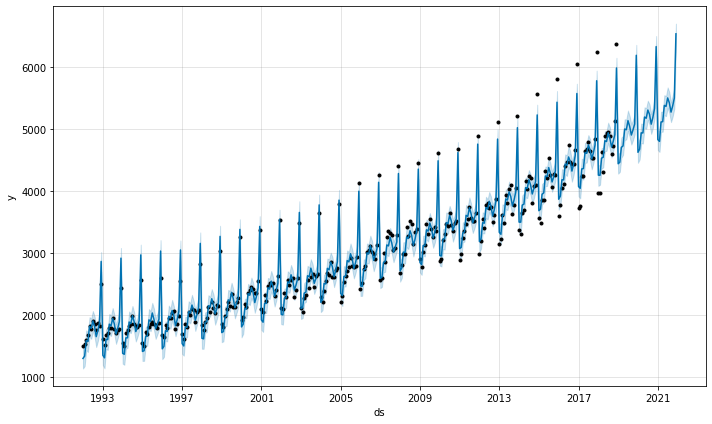

In [ ]:
m.plot(forecast);

ConversionError: ignored

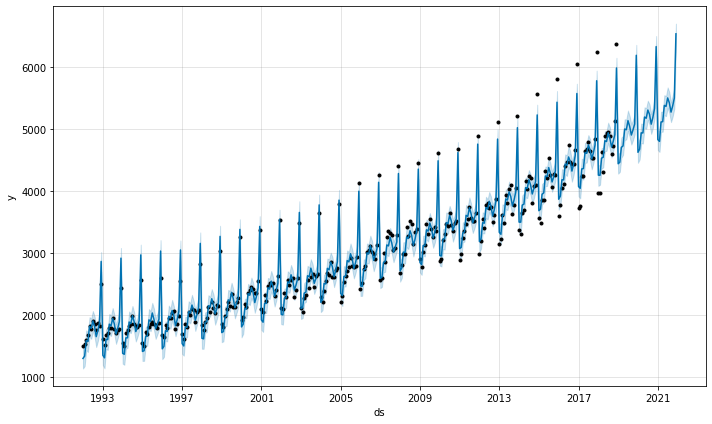

In [ ]:
m.plot(forecast)
plt.xlim('2014-01-01','2021-01-01')

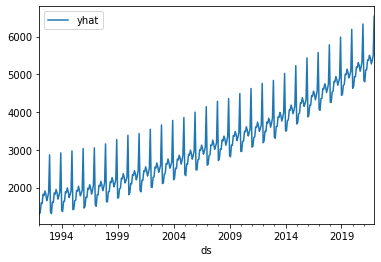

In [ ]:
forecast.plot(x='ds',y='yhat')

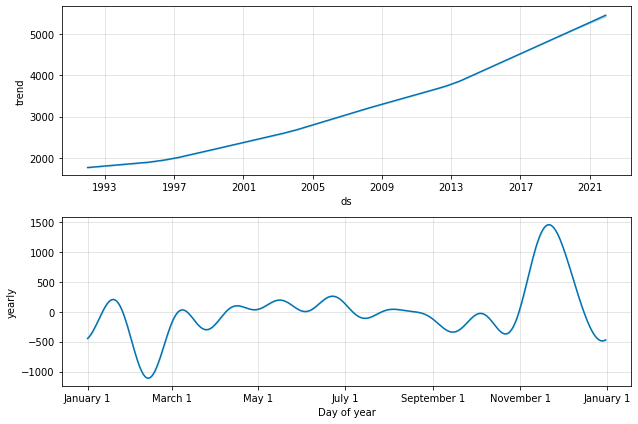

In [ ]:
m.plot_components(forecast);